In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


In [2]:
df=pd.read_csv('Salaries_pd.csv')

C:\Users\SANCHIT\AppData\Local\Temp\ipykernel_1704\56855710.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Salaries_pd.csv')


In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in numeric_cols:
    df[col]=pd.to_numeric(df[col], errors='coerce')

# Filling missing values for numeric columns with median
for col in numeric_cols:
    df[col]=df[col].fillna(df[col].median())

In [5]:
#Filling Categorical missing values
df['JobTitle'] = df['JobTitle'].fillna("Unknown")
df['Notes'] = df['Notes'].fillna("No Notes")
df['Status'] = df['Status'].fillna("Unknown")

# Converting categorical columns to numeric using Label Encoding
df['JobTitle'] = df['JobTitle'].astype(str)
df['Notes'] = df['Notes'].astype(str)
df['Status'] = df['Status'].astype(str)

In [10]:
encoder= LabelEncoder()

for col in ['JobTitle', 'Notes', 'Status']:
    df[col]= encoder.fit_transform(df[col])

print("\n Missing values after preprocessing : \n", df.isnull().sum())
print("Data cleaning and Preprocessing done successfully! \n ")


 Missing values after preprocessing : 
 Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64
Data cleaning and Preprocessing done successfully! 
 


In [11]:
#Correlation checking
numeric_features=  ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
corr_matrix=df[numeric_features].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                    BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
BasePay           1.000000     0.266688  0.283747  0.797311  0.950689   
OvertimePay       0.266688     1.000000  0.316594  0.263699  0.504860   
OtherPay          0.283747     0.316594  1.000000  0.202007  0.470495   
Benefits          0.797311     0.263699  0.202007  1.000000  0.773559   
TotalPay          0.950689     0.504860  0.470495  0.773559  1.000000   
TotalPayBenefits  0.943166     0.467984  0.422341  0.814595  0.977313   

                  TotalPayBenefits  
BasePay                   0.943166  
OvertimePay               0.467984  
OtherPay                  0.422341  
Benefits                  0.814595  
TotalPay                  0.977313  
TotalPayBenefits          1.000000  


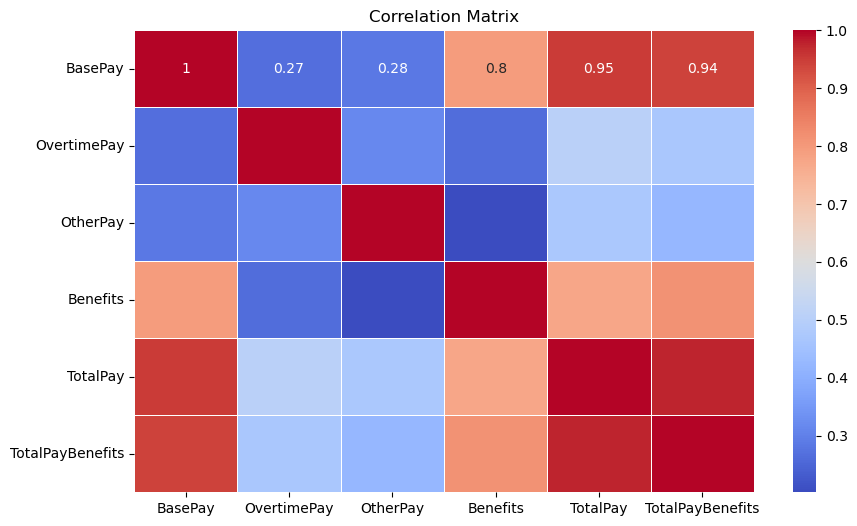

In [14]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True , cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [28]:
#Encoding categorical variables
label_encoder = LabelEncoder()
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])
df['Agency'] = label_encoder.fit_transform(df['Agency'])
df=pd.get_dummies(df, columns=['Status'], drop_first=True) #One Hot Encoding


In [29]:

# Scaling numerical features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

C:\Users\SANCHIT\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


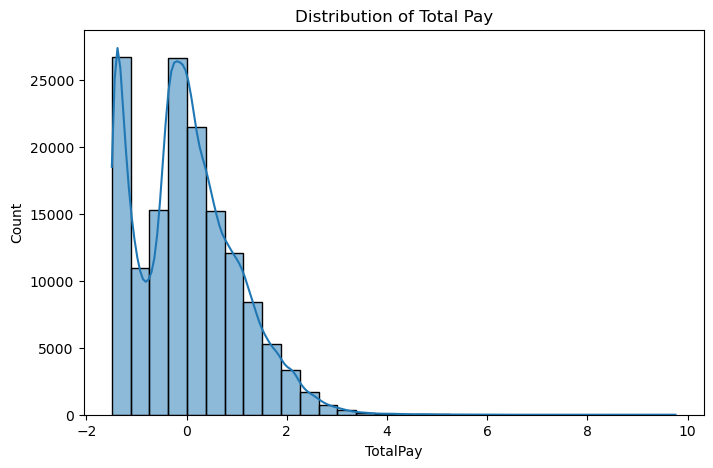

In [39]:
# Data Visualization
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPay'], bins=30, kde=True)
plt.title("Distribution of Total Pay")
plt.show()

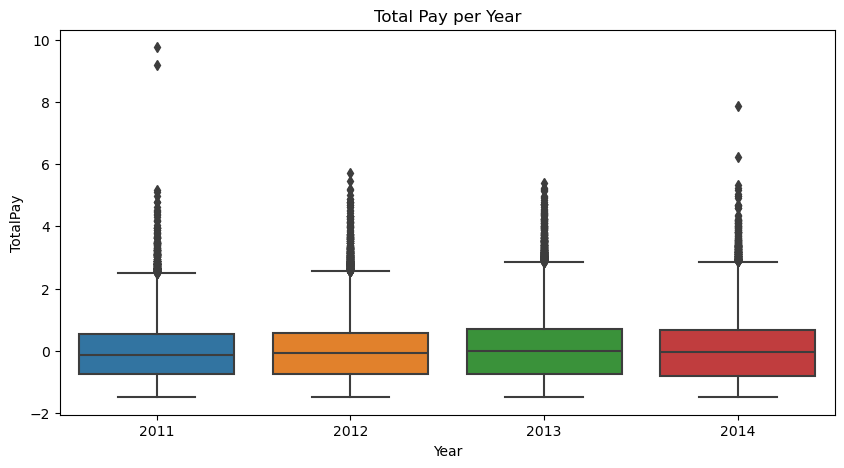

In [36]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='TotalPay', data=df)
# plt.xticks(rotation=45)
plt.title("Total Pay per Year")
plt.show()

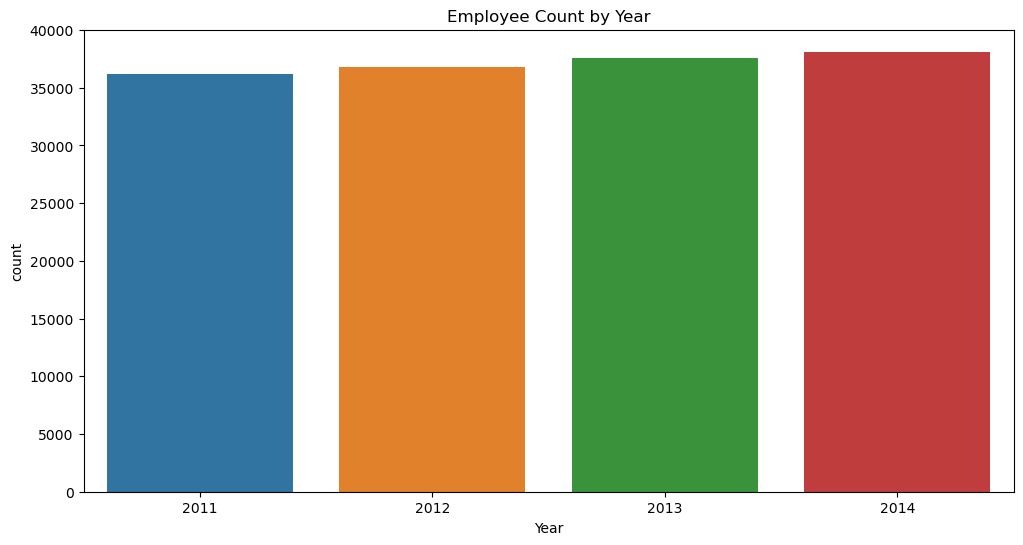

In [37]:

plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title("Employee Count by Year")
plt.show()

In [38]:
print("Exploratory Data Analysis Completed Successfully!!!\n")

Exploratory Data Analysis Completed Successfully!!!

